In [111]:
import numpy as np
import networkx as nx
import scipy
from scipy.sparse import linalg
import matplotlib.pyplot as plt

In [250]:
# Create a 4-neighbour grid
N = 20
G = nx.grid_2d_graph(N, N)
pos = nx.spring_layout(G, iterations=100)
for node in G.nodes:
    x, y = node
    if x != N-1:
        if y != 0:
            G.add_edge(node, (x + 1, y - 1))
        if y != N-1:
            G.add_edge(node, (x + 1, y + 1))

In [251]:
x = np.linspace(0, 1, N)
#x = np.meshgrid(x, x)[0]
pos = {node:[x[node[0]], x[node[1]]] for node in G.nodes}
val = {node:x[node[0]]+x[node[1]] for node in G.nodes}
labels = {node:f"{val[node]:.2f}" for node in G.nodes}

In [252]:
l_labels = np.zeros((N,N))
for node in G.nodes:
    l_labels[node[1], node[0]] = labels[node]

In [246]:
# Create a colormap, and then get colors from labels
cmap = plt.get_cmap('inferno')
greys = plt.get_cmap('Greys')

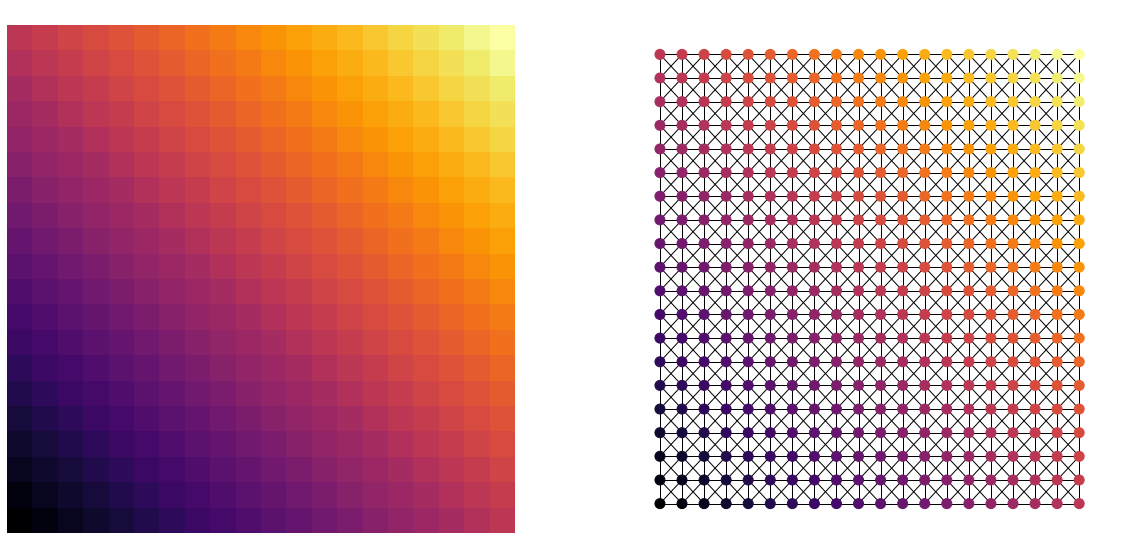

In [253]:
fig, axs = plt.subplots(1, 2, figsize=(20, 10))

nx.draw(G, pos=pos, node_size=100, ax=axs[1], cmap=cmap, node_color=list(val.values()))
grid = axs[0].imshow(np.flip(np.flip(l_labels), axis=1), cmap=cmap)
axs[0].set_axis_off()

#for node in G.nodes:
    #color = 'white'
    #if node == (1,1):
    #    color = 'black'
    #axs[0].text(node[0], 2-node[1], labels[node], fontsize=20, color=color, ha='center', va='center')
    #nx.draw_networkx_labels(G, labels={node:labels[node]}, pos={node:pos[node]}, font_color=color, ax=axs[1], font_size=20)

In [115]:
A

<400x400 sparse matrix of type '<class 'numpy.int64'>'
	with 2964 stored elements in Compressed Sparse Row format>

In [107]:
A = nx.to_scipy_sparse_matrix(G)
A = A.asfptype()
eigenvalues, eigenvectors = linalg.eigs(A)
q, r = np.linalg.qr(A.A)

In [270]:
G = nx.barabasi_albert_graph(n=12, m=1)
pos = nx.spring_layout(G, iterations=1000)

In [306]:
colors = ['cornflowerblue' for node in G.nodes]
for n in G.neighbors(1):
    colors[n] = 'red'
colors[1] = 'red' 

In [310]:
labels = {1:r'$u$', 0:r'$x$', 4:r'$y$', 8:r'$z$'}
pos = nx.spring_layout(G, iterations=1000)

{1: Text(-0.031794335664153316, -0.04441738237287296, '$u$'),
 0: Text(-0.4275631122392286, 0.10753067902696137, '$x$'),
 4: Text(0.4188392707060622, -0.14651516062493702, '$y$'),
 8: Text(-0.0967551349546605, 0.14985451222922755, '$z$')}

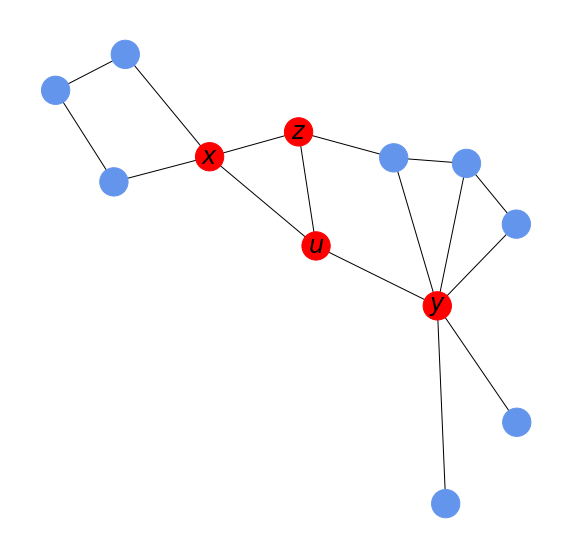

In [311]:
fig, ax = plt.subplots(1, 1, figsize=(10, 10))

nx.draw(G, pos=pos, node_size=800, node_color=colors)
nx.draw_networkx_labels(G, pos=pos, labels=labels, font_size=24)